In [1]:
import os
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from utils.gait_gallery import GaitGallery


In [2]:
gallary = GaitGallery('../gait_gallery.pkl')
gallary.gallery_stats()

Loaded gallery from ../gait_gallery.pkl with 5 identities


{'total_identities': 5,
 'total_embeddings': 5,
 'embeddings_per_identity': {'1': 1, '2': 1, '3': 1, '4': 1, '5': 1},
 'embedding_dimensions': [256]}

In [3]:
import pickletools

with open('../gait_gallery.pkl', 'rb') as f:
    pickletools.dis(f)

    0: \x80 PROTO      4
    2: \x95 FRAME      6822
   11: \x8c SHORT_BINUNICODE 'utils.gait_gallery'
   31: \x94 MEMOIZE    (as 0)
   32: \x8c SHORT_BINUNICODE 'GaitGallery'
   45: \x94 MEMOIZE    (as 1)
   46: \x93 STACK_GLOBAL
   47: \x94 MEMOIZE    (as 2)
   48: )    EMPTY_TUPLE
   49: \x81 NEWOBJ
   50: \x94 MEMOIZE    (as 3)
   51: }    EMPTY_DICT
   52: \x94 MEMOIZE    (as 4)
   53: (    MARK
   54: \x8c     SHORT_BINUNICODE 'gallery'
   63: \x94     MEMOIZE    (as 5)
   64: }        EMPTY_DICT
   65: \x94     MEMOIZE    (as 6)
   66: (        MARK
   67: \x8c         SHORT_BINUNICODE '1'
   70: \x94         MEMOIZE    (as 7)
   71: ]            EMPTY_LIST
   72: \x94         MEMOIZE    (as 8)
   73: \x8c         SHORT_BINUNICODE 'torch._utils'
   87: \x94         MEMOIZE    (as 9)
   88: \x8c         SHORT_BINUNICODE '_rebuild_tensor_v2'
  108: \x94         MEMOIZE    (as 10)
  109: \x93         STACK_GLOBAL
  110: \x94         MEMOIZE    (as 11)
  111: (            MARK
  112

In [11]:
import pickle
from utils.gait_gallery import GaitGallery

with open('../gait_gallery.pkl', 'rb') as f:
    gallery = pickle.load(f)


In [13]:
print(gallery)
print(gallery.gallery_stats())
print(gallery.gallery_stats().keys())

{'total_identities': 5, 'total_embeddings': 5, 'embeddings_per_identity': {'1': 1, '2': 1, '3': 1, '4': 1, '5': 1}, 'embedding_dimensions': [256]}
dict_keys(['total_identities', 'total_embeddings', 'embeddings_per_identity', 'embedding_dimensions'])


In [14]:
print("Number of rows (total embeddings):", gallery.gallery_stats()['total_embeddings'])

Number of rows (total embeddings): 5


In [16]:
# Check what attributes are available on gallery
print(dir(gallery))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_embedding', 'find_match', 'gallery', 'gallery_path', 'gallery_stats', 'get_aggregated_embedding', 'get_or_assign_identity', 'load_gallery', 'next_id', 'save_gallery', 'track_to_identity', 'update_embedding']


In [17]:
print(type(gallery.gallery))  # check the type first
print(len(gallery.gallery))   # number of items inside

# If it's a list or dict, print some elements
if isinstance(gallery.gallery, dict):
    for key, value in gallery.gallery.items():
        print(f"ID {key}: {value}")
elif isinstance(gallery.gallery, list):
    for i, item in enumerate(gallery.gallery):
        print(f"Item {i}: {item}")
else:
    print(gallery.gallery)  # fallback, just print whatever it is


<class 'dict'>
5
ID 1: [tensor([-0.1225, -0.0414, -0.0677,  0.0497, -0.0817,  0.0186,  0.0162, -0.0317,
        -0.0144, -0.0260, -0.0528, -0.0307, -0.1160, -0.0319,  0.0535, -0.0117,
        -0.0106,  0.1440, -0.0540, -0.0474, -0.0243,  0.0334,  0.0265, -0.1112,
         0.0104,  0.1081,  0.0100, -0.0214,  0.1213, -0.0516,  0.0197,  0.0712,
         0.0008, -0.0422,  0.0520, -0.0379,  0.0489,  0.0188,  0.0317, -0.0459,
        -0.0402,  0.0473, -0.0171,  0.0432, -0.0887,  0.0446,  0.0056,  0.0998,
         0.0225,  0.0728, -0.0679,  0.0822,  0.0603,  0.0135,  0.0198,  0.0379,
         0.0526, -0.0265, -0.0174,  0.0134, -0.0229,  0.0846,  0.1271,  0.0160,
        -0.0476,  0.0519,  0.0118, -0.1545,  0.0516,  0.0066,  0.0820, -0.0055,
         0.0573, -0.0732,  0.0367,  0.0595, -0.0076,  0.0153,  0.0322,  0.0051,
         0.0122, -0.0436, -0.0348, -0.0950,  0.0362, -0.0098,  0.0349, -0.0567,
        -0.0489,  0.1405, -0.0185, -0.0337, -0.0335, -0.0552, -0.1120, -0.0052,
         0.0339,

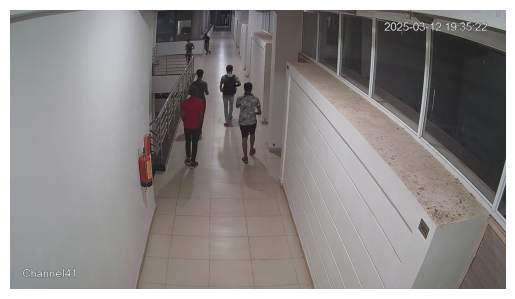

In [2]:
import cv2 
import matplotlib.pyplot as plt

file_name = '../../Person_New/input/3c.mp4'
cap = cv2.VideoCapture(file_name)
if not cap.isOpened():
    print("Error: Could not open video.")
cap.set(cv2.CAP_PROP_POS_FRAMES, 1000)  # Start from the first frame
ret, frame = cap.read()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()